# Programming Exercise 8 - Anomaly Detection and Recommender Systems

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

%matplotlib inline

import seaborn as sns


# 1. Anomaly detection

In [14]:
data1 = loadmat('data/ex8data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [15]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (307, 2)


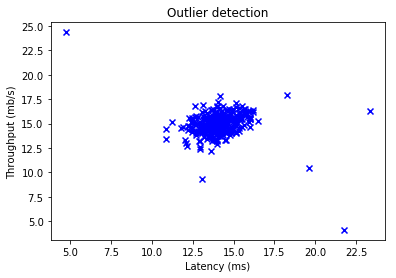

In [16]:
plt.scatter(X1[:,0], X1[:,1], c='b', marker='x')
plt.title("Outlier detection")
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

In [17]:
clf = EllipticEnvelope()
clf.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

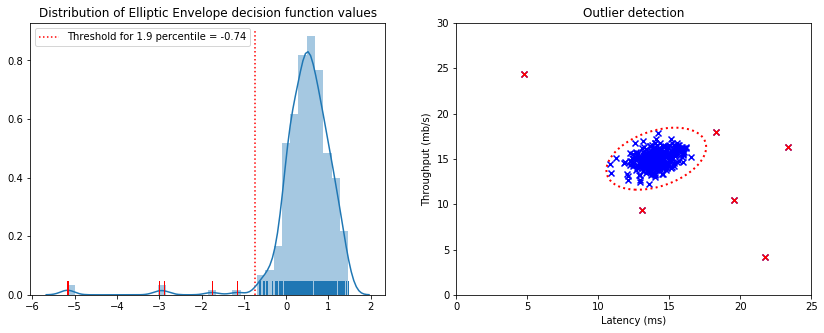

In [18]:
xx, yy = np.meshgrid(np.linspace(0, 25, 200), np.linspace(0, 30, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Вычислим функцию решения и используем пороговое значение для определения выбросов
y_pred = clf.decision_function(X1).ravel()
percentile = 1.9
threshold = np.percentile(y_pred, percentile)
outliers = y_pred < threshold

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

# 1)
# Plot the decision function values
sns.distplot(y_pred, rug=True, ax=ax1)
# Plot the decision function values for the outliers in red
sns.distplot(y_pred[outliers], rug=True, hist=False, kde=False, norm_hist=True, color='r', ax=ax1)
ax1.vlines(threshold, 0, 0.9, colors='r', linestyles='dotted',
           label='Threshold for {} percentile = {}'.format(percentile, np.round(threshold, 2)))
ax1.set_title('Distribution of Elliptic Envelope decision function values');
ax1.legend(loc='best')

# 2)
# Plot the observations
ax2.scatter(X1[:,0], X1[:,1], c='b', marker='x')
# Plot outliers
ax2.scatter(X1[outliers][:,0], X1[outliers][:,1], c='r', marker='x', linewidths=2)
# Plot decision boundary based on threshold
ax2.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red', linestyles='dotted')
ax2.set_title("Outlier detection")
ax2.set_xlabel('Latency (ms)')
ax2.set_ylabel('Throughput (mb/s)');

# 2. Recommender Systems


In [19]:
data2 = loadmat('data/ex8_movies.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [20]:
Y = data2['Y']
R = data2['R']
print('Y:', Y.shape)
print('R:', R.shape)

Y: (1682, 943)
R: (1682, 943)


In [21]:
print(Y)

[[5 4 0 ... 5 0 0]
 [3 0 0 ... 0 0 5]
 [4 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(R)

[[1 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


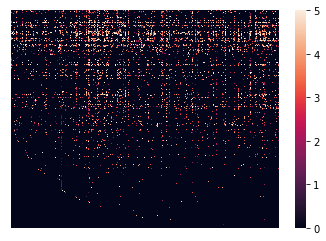

In [23]:
sns.heatmap(Y, yticklabels=False, xticklabels=False);
